In [1]:
# Mount the google drive content into the current instance of colab notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip and extract the content present in the dataset

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NNFL Project/emotion_dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Importing necessary libraries

import tensorflow as tf  #pip install tensorflow
import cv2 #pip install opencv
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Function to read the image data and store it in the form of a matrix of pixel values
img_array = cv2.imread("/content/emotion_dataset/train/angry/im0.png")

In [ ]:
img_array.shape

(48, 48, 3)

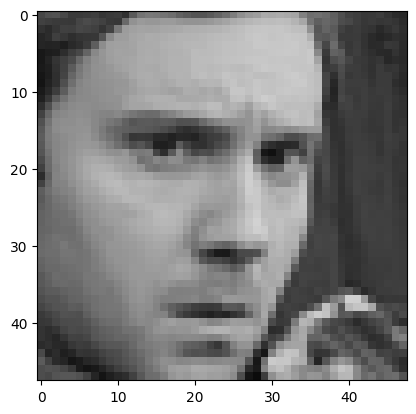

In [ ]:
# Function that helps us to visualize the image
plt.imshow(img_array)

In [ ]:
Datadirectory="/content/emotion_dataset/train"

In [ ]:
Classes=["angry","disgusted","fearful","happy","neutral","sad","surprised"]
#Classes=["0","1","2","3","4","5","6"]

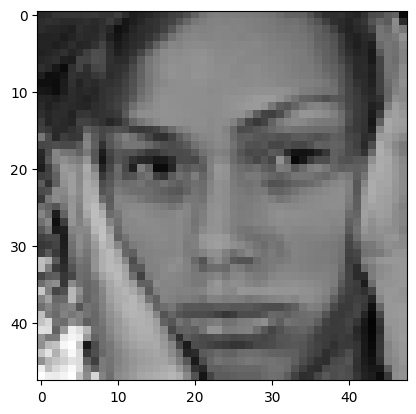

In [ ]:

for category in Classes:
  path=os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    plt.show()
    break
  break

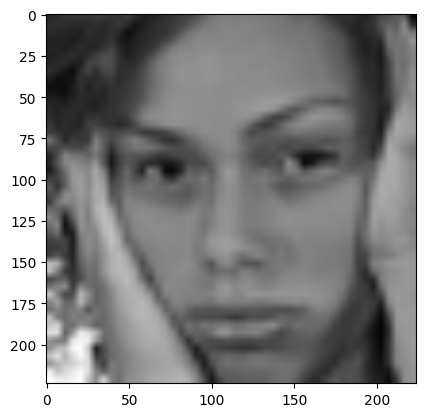

In [ ]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB));
plt.show()

In [ ]:
# To obtain the dataset from the set of images

training_Data = [] ## data array

def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_str = Classes.index(category)

    counter = 0
    for img in os.listdir(path):
      if(counter < 400):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          new_array = cv2.resize(img_array, (img_size, img_size))
          training_Data.append([new_array, class_str])
        except Exception as e:
          pass

        counter = counter + 1
      else:
        continue



In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

2800


In [ ]:
# Function to randomly shuffle the dataset
import random
random.shuffle(training_Data)

In [ ]:
# To divide the dataset into input and output features.

x=[] #data/feature
y=[] ##label
for feature,label in training_Data:
  x.append(feature)
  y.append(label)
x=np.array(x).reshape(-1, img_size, img_size, 3)

In [ ]:
x.shape

(2800, 224, 224, 3)

In [ ]:
# Normalizing the input features
x=x/255.0

In [ ]:
y=np.array(y)

In [ ]:
# Importing the transfer learning model: MobileNetV2 for facial image emotion classification
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
# Final layers of the model to classify the data

final_output = tf.keras.layers.Dense(120)(base_output)
final_output = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(64)(final_output)
final_output = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
# Fucntion to define the inputs and outputs for the model
new_model=tf.keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
# Gives a summary of the model
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
# Compilation of the model!
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# To fit the model to the dataset
new_model.fit(x,y,epochs=10)

Epoch 1/10
88/88 [==============================] - 51s 144ms/step - loss: 1.7584 - accuracy: 0.3225
Epoch 2/10
88/88 [==============================] - 11s 130ms/step - loss: 1.4637 - accuracy: 0.4554
Epoch 3/10
88/88 [==============================] - 12s 132ms/step - loss: 1.2463 - accuracy: 0.5329
Epoch 4/10
88/88 [==============================] - 12s 134ms/step - loss: 1.1496 - accuracy: 0.5743
Epoch 5/10
88/88 [==============================] - 12s 136ms/step - loss: 0.9739 - accuracy: 0.6404
Epoch 6/10
88/88 [==============================] - 12s 137ms/step - loss: 0.9245 - accuracy: 0.6596
Epoch 7/10
88/88 [==============================] - 12s 134ms/step - loss: 0.7966 - accuracy: 0.7118
Epoch 8/10
88/88 [==============================] - 12s 133ms/step - loss: 0.7112 - accuracy: 0.7357
Epoch 9/10
88/88 [==============================] - 12s 133ms/step - loss: 0.6373 - accuracy: 0.7729
Epoch 10/10
88/88 [==============================] - 12s 134ms/step - loss: 0.5475 - accura

In [ ]:
# To save the model once trained for further usage.

new_model.save("/content/drive/MyDrive/NNFL Project/Models/final_model_95p07.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
